## Labs for Tuesday and Wednesday

Import the required libraries and modules that you would need.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Read that data into Python and call the dataframe churnData.

In [76]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [77]:
churnData


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [78]:
churnData = churnData.replace('^\s*$',np.nan, regex = True)

In [79]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

In [80]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Check for null values in the dataframe. Replace the null values

In [81]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [82]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [83]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [84]:
y = churnData['Churn']

In [85]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

### Switching Target Variable from Yes and No to 1(Yes) and 0 (No)

In [86]:
y = pd.Series(y)

In [87]:
#churnData['Churn'] = churnData['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
churnData = churnData.replace(to_replace = ['Yes','No'],value = [1,0])
churnData = churnData.replace({'Churn': {'Yes': 1, 'No': 0}})

In [88]:
y = churnData['Churn']

In [89]:
np.unique(y)

array([0, 1], dtype=int64)

In [92]:
churnData['Churn'].value_counts(normalize=True)

0   0.73
1   0.27
Name: Churn, dtype: float64

In [93]:
churnData['Churn'] = pd.to_numeric(churnData['Churn'])

### Split the data into a training set and a test set

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


### Balancing

In [103]:
# Apply oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Verify the class distribution after balancing
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4143, 1: 4143}


### Scale the features  by using a standard scaler

In [104]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train_resampled)
X_test_std = scaler.transform(X_test)

### Apply K-fold cross validation on your models before and check the model score

In [146]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train_std, y_train_resampled)

print("X_train_std has %d rows and %d columns"  %(X_train_std.shape[0],X_train_std.shape[1]))
print("-----------------------------------")
print("The coefficient of determination for the test data is R2=%.2f"
      %(model.score(X_test_std, y_test)))
print("The coefficient of determination for the train data is R2=%.2f"
      %(model.score(X_train_std, y_train_resampled)))

X_train_std has 8318 rows and 4 columns
-----------------------------------
The coefficient of determination for the test data is R2=0.73
The coefficient of determination for the train data is R2=0.79


In [147]:
scores = cross_val_score(model, X_train_std, y_train_resampled, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.74579327 0.75120192 0.73798077 0.75225496 0.75285628]
Score stats: 0.75 accuracy with a standard deviation of 0.01


### Model Comparison

In [149]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_std, y_train_resampled, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7442914797169158, 'Logistic Regression': 0.7331109932235533, 'KNN': 0.7466951813219853}


In [150]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.74,0.73,0.75


### (optional)Fit a logistic Regression model on the training data

In [105]:
log_model = LogisticRegression() 
log_model.fit(X_train_std, y_train_resampled)

y_pred_train_log = log_model.predict(X_train_std)
y_pred_test_log = log_model.predict(X_test_std)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_resampled, y_pred_train_log),
                                         precision_score(y_train_resampled, y_pred_train_log),
                                         recall_score(y_train_resampled, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.74,0.74
1,Precision,0.73,0.51
2,Recall,0.75,0.75


### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data

In [21]:
X.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692,2283.300441
std,24.559481,0.368612,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,9.000000,0.000000,35.500000,402.225000
50%,29.000000,0.000000,70.350000,1400.550000
75%,55.000000,0.000000,89.850000,3786.600000
max,72.000000,1.000000,118.750000,8684.800000


In [106]:
y.value_counts(normalize=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [107]:
TT_SPLIT = 0.2     
RAND_STATE = 123

In [108]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [109]:
# Apply oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Verify the class distribution after balancing
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4159, 1: 4159}


In [111]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train_resampled)
X_test_std = scaler.transform(X_test)

In [116]:
model = KNeighborsClassifier(n_neighbors= 5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_std, y_train_resampled) # train model
y_pred = model.predict(X_test_std) # predict test
y_pred_train=model.predict(X_train_std) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [117]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [118]:
y_pred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [119]:
y_test.head(5)

941     0
1404    0
5515    0
3684    0
7017    0
Name: Churn, dtype: int64

### Confusion Matrix

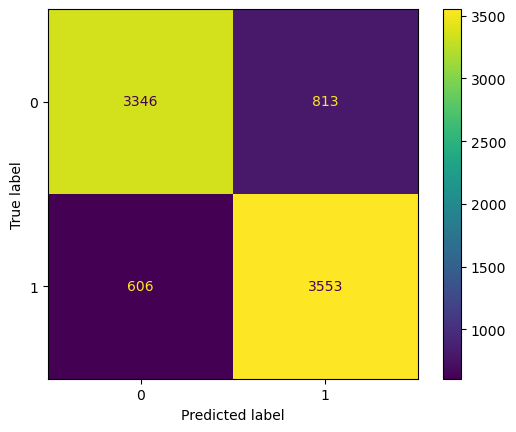

In [120]:
cm = confusion_matrix(y_train_resampled, y_pred_train, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

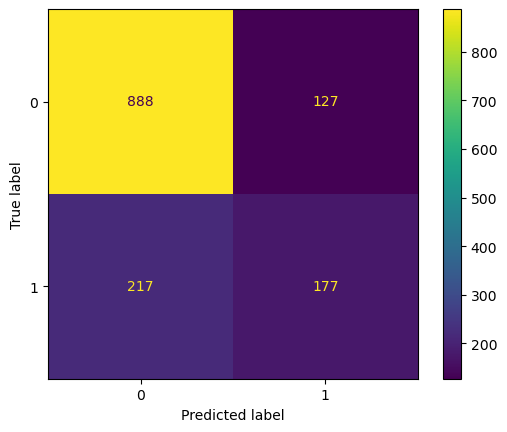

In [30]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [121]:
def evaluate_classification_model(y_train_resampled, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_resampled, y_pred_train),
                                         precision_score(y_train_resampled, y_pred_train),
                                         recall_score(y_train_resampled, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train_resampled, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [123]:
error_metrics_df,y_train_resampled_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train_resampled, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.83,0.72
1,Precision,0.81,0.50
2,Recall,0.85,0.70


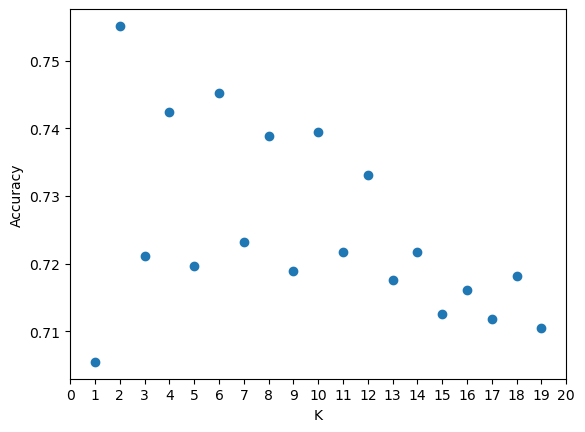

In [124]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train_resampled)
    scores.append(knn.score(X_test_std, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

In [127]:
for i in range (1, 20):
        model = KNeighborsClassifier(n_neighbors=i,weights='uniform') # declare we're using knn classification model
        model.fit(X_train_std, y_train_resampled)
        y_pred = model.predict(X_test_std)
        y_pred_train=model.predict(X_train_std)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train_resampled, y_pred_train),
                                         precision_score(y_train_resampled, y_pred_train),
                                         recall_score(y_train_resampled, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
        pd.options.display.float_format = '{:.2f}'.format
        print("For K=", i, "\n", performance_df,"\n" )

For K= 1 
   Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   1.00  0.48
2       Recall   0.98  0.61 

For K= 2 
   Error_metric  Train  Test
0     Accuracy   0.87  0.76
1    Precision   1.00  0.58
2       Recall   0.74  0.47 

For K= 3 
   Error_metric  Train  Test
0     Accuracy   0.86  0.72
1    Precision   0.85  0.50
2       Recall   0.88  0.64 

For K= 4 
   Error_metric  Train  Test
0     Accuracy   0.84  0.74
1    Precision   0.88  0.54
2       Recall   0.78  0.56 

For K= 5 
   Error_metric  Train  Test
0     Accuracy   0.83  0.72
1    Precision   0.81  0.50
2       Recall   0.85  0.70 

For K= 6 
   Error_metric  Train  Test
0     Accuracy   0.82  0.75
1    Precision   0.84  0.54
2       Recall   0.78  0.64 

For K= 7 
   Error_metric  Train  Test
0     Accuracy   0.81  0.72
1    Precision   0.80  0.50
2       Recall   0.84  0.73 

For K= 8 
   Error_metric  Train  Test
0     Accuracy   0.80  0.74
1    Precision   0.82  0.53
2       Recall   0.78  0.67 



In [128]:
sample = np.array([4, 2, 32, 1000]).reshape(1, -1)
sample =scaler.transform(sample)

C:\Users\Tahor\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [129]:
model.predict(sample)

array([1], dtype=int64)

In [130]:
model.predict_proba(sample) #what is the probability of customer leaving and not leaving 

array([[0.26315789, 0.73684211]])

## Wednesday Lab (Decision Tree)

### Fit a Decision Tree Classifier on the training data &Check the accuracy on the test data.

In [131]:
model.fit(X_train_std, y_train_resampled)

y_pred_train_dt = model.predict(X_train_std)
y_pred_test_dt = model.predict(X_test_std)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_resampled, y_pred_train_dt),
                                         precision_score(y_train_resampled, y_pred_train_dt),
                                         recall_score(y_train_resampled, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.78,0.71
1,Precision,0.76,0.49
2,Recall,0.83,0.74


### Confusion Matrix

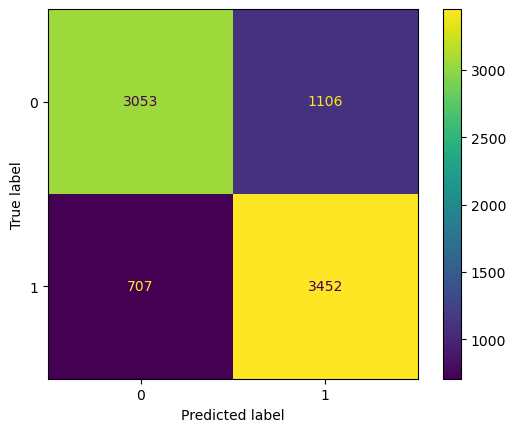

In [132]:
cm = confusion_matrix(y_train_resampled, y_pred_train_dt, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

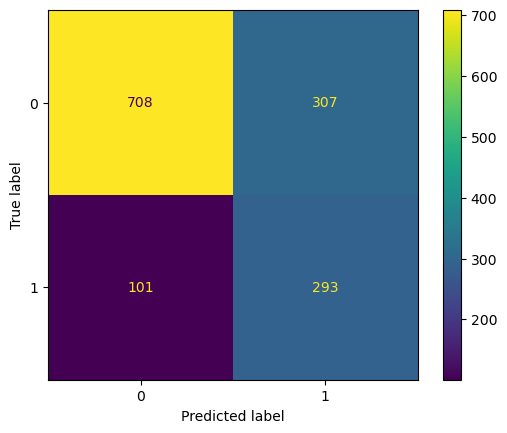

In [134]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Feature Importance

<BarContainer object of 4 artists>

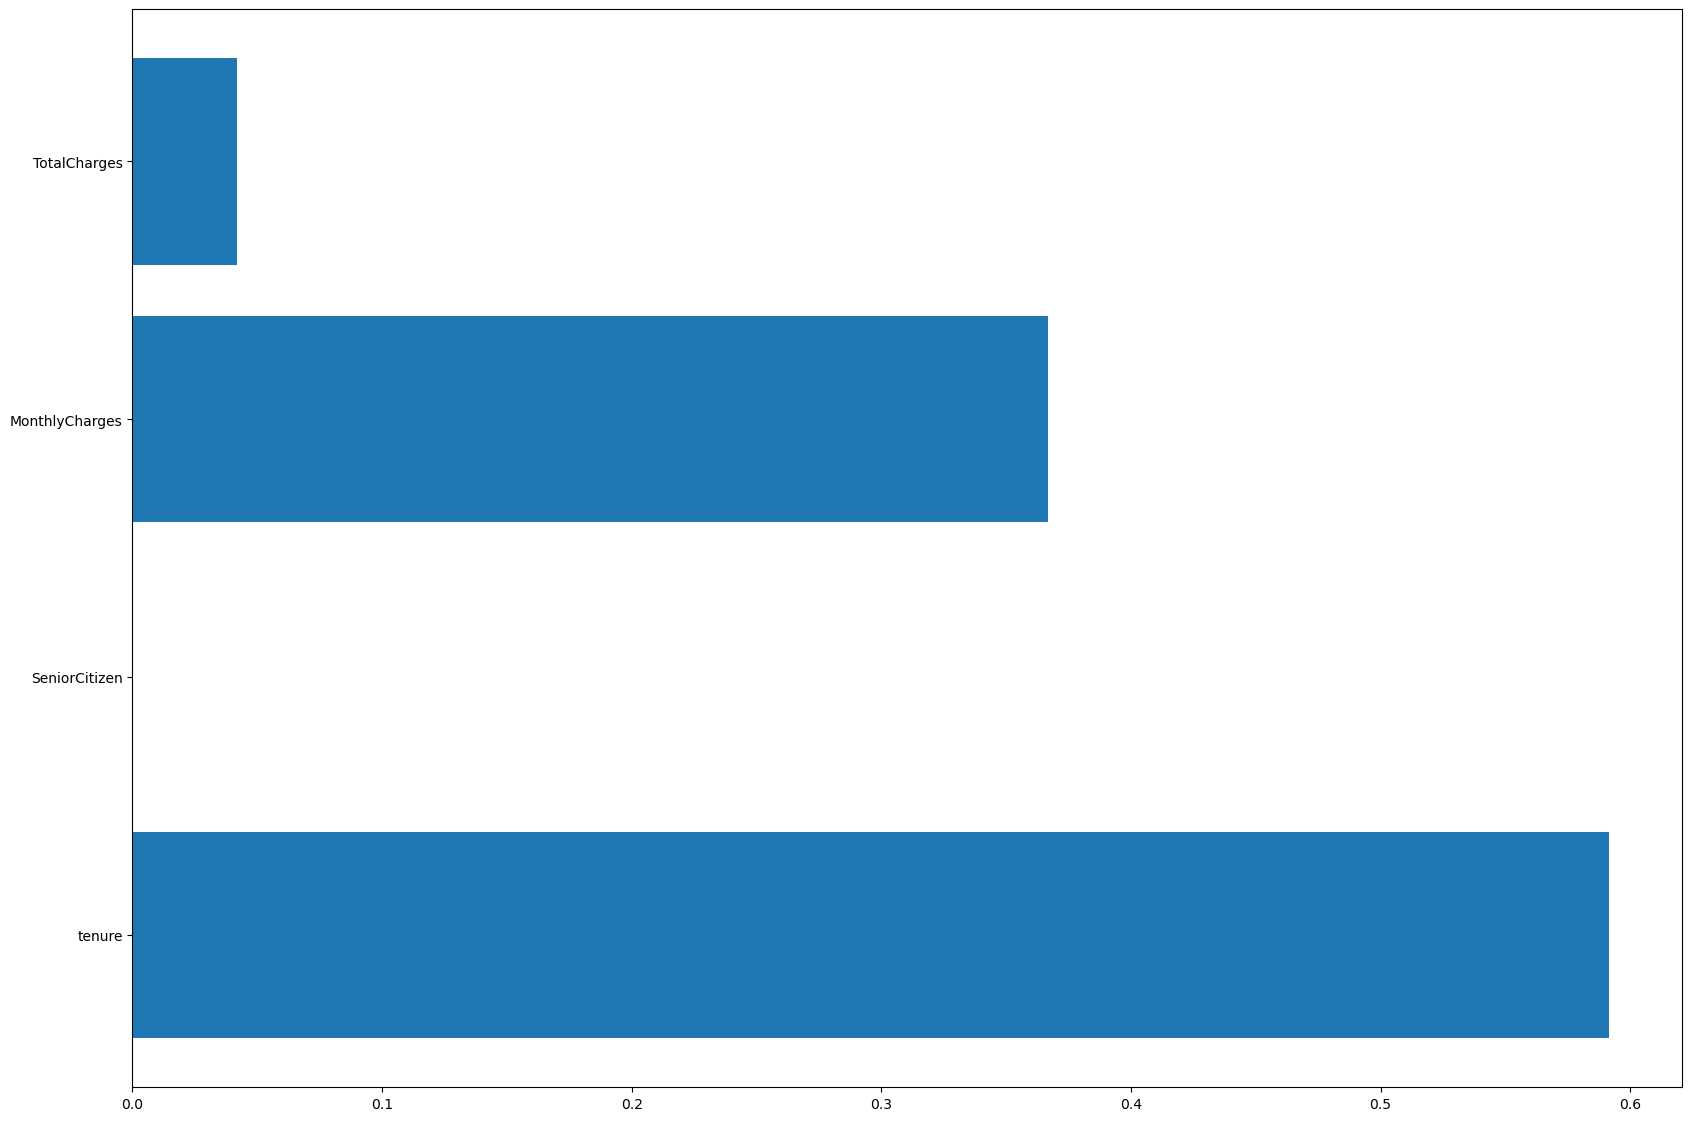

In [61]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

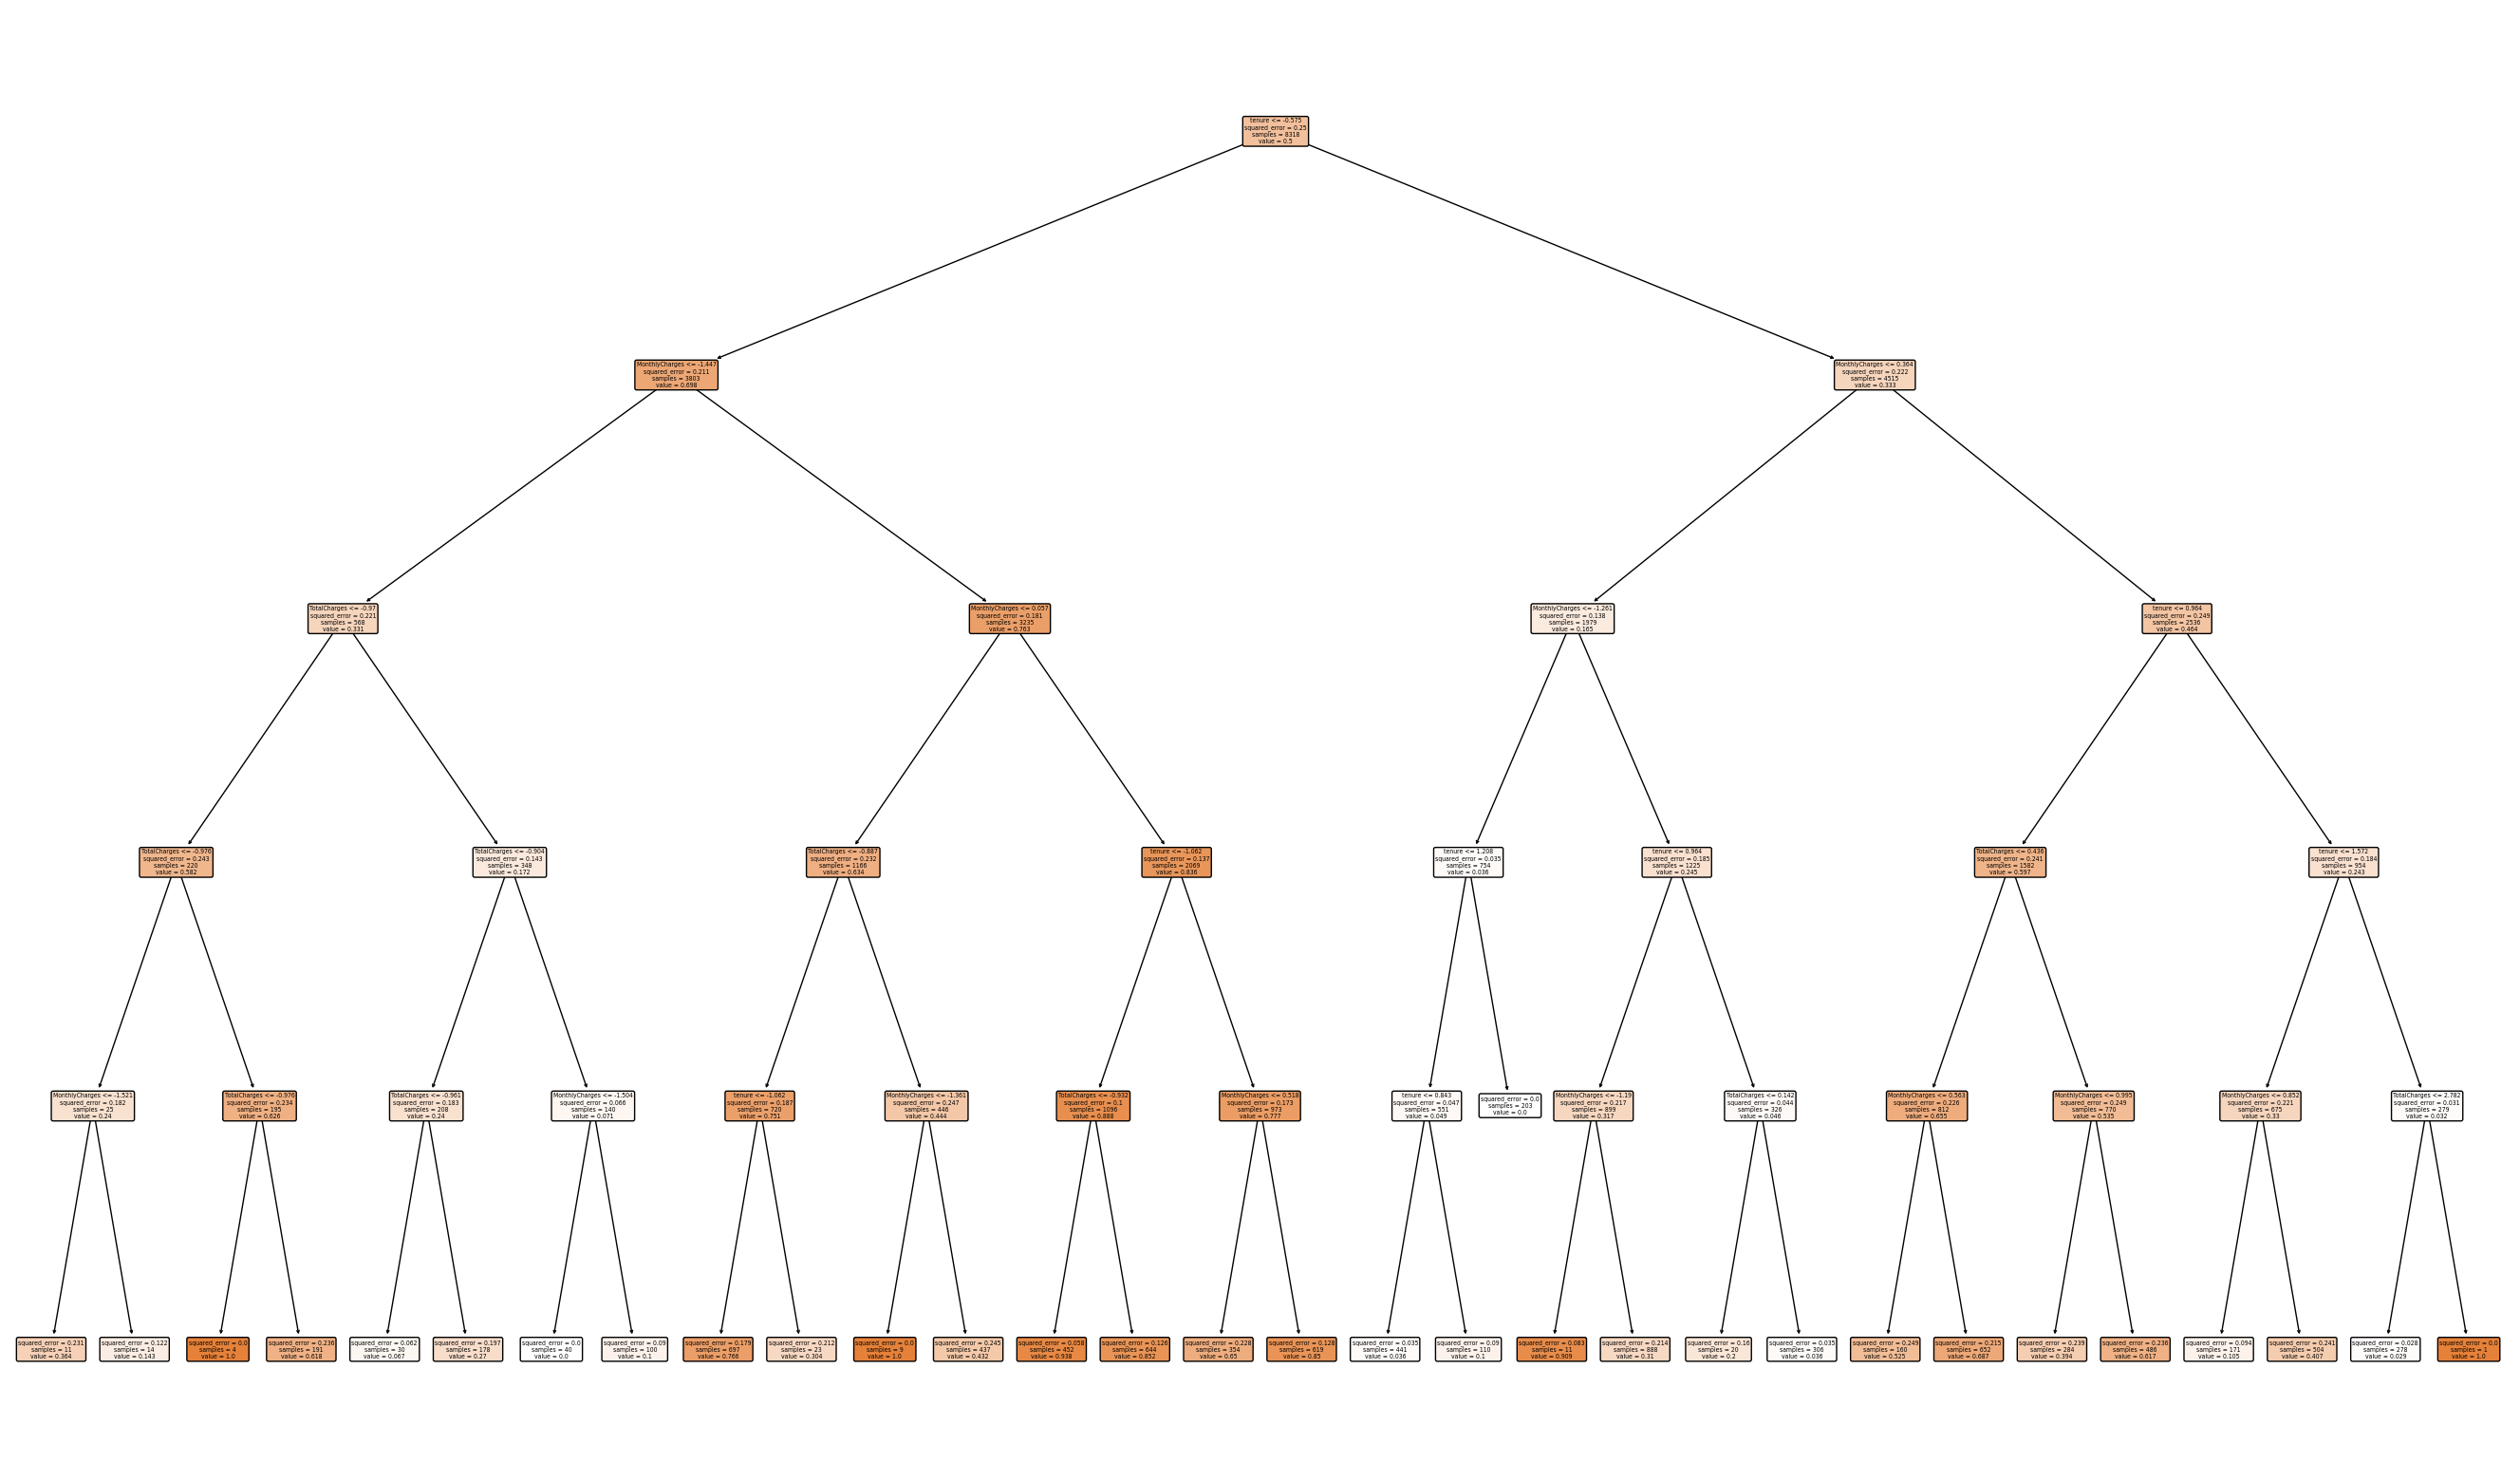

In [141]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

C:\Users\Tahor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tahor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


' Depth 1'

,Error_metric,Train,Test
0,Accuracy,0.74,0.73
1,Precision,0.00,0.00
2,Recall,0.00,0.00


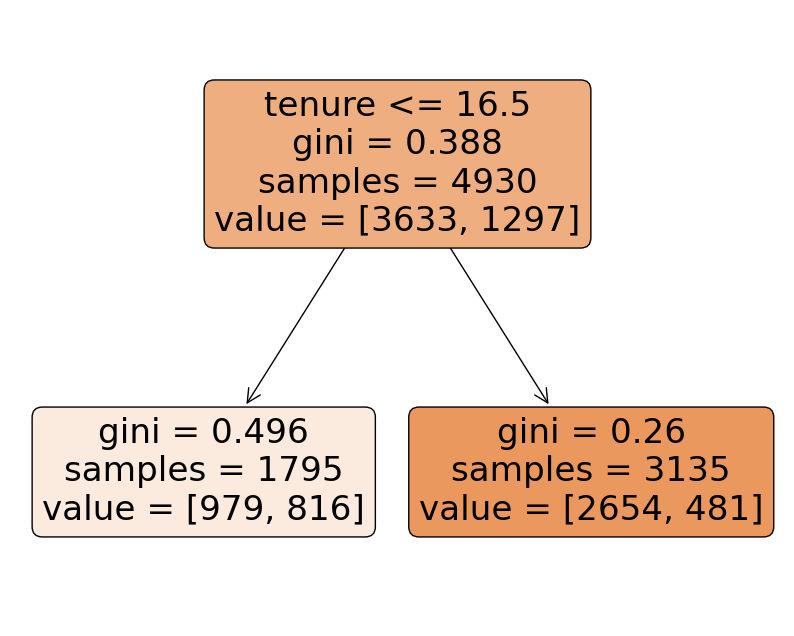

' Depth 2'

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


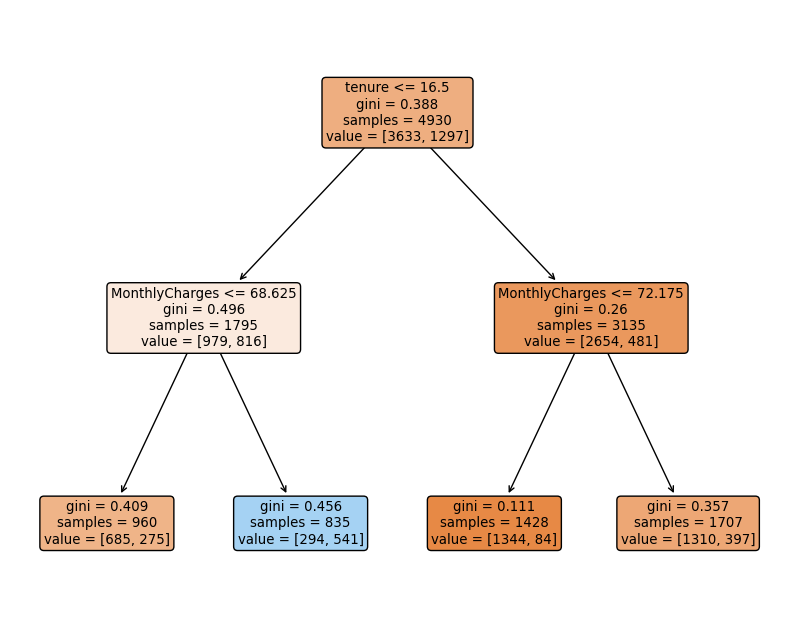

' Depth 3'

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


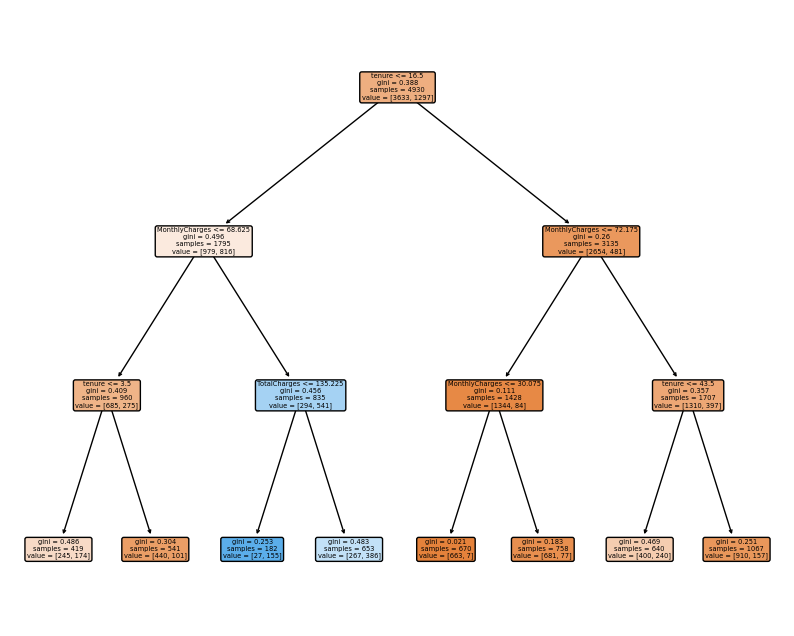

' Depth 4'

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


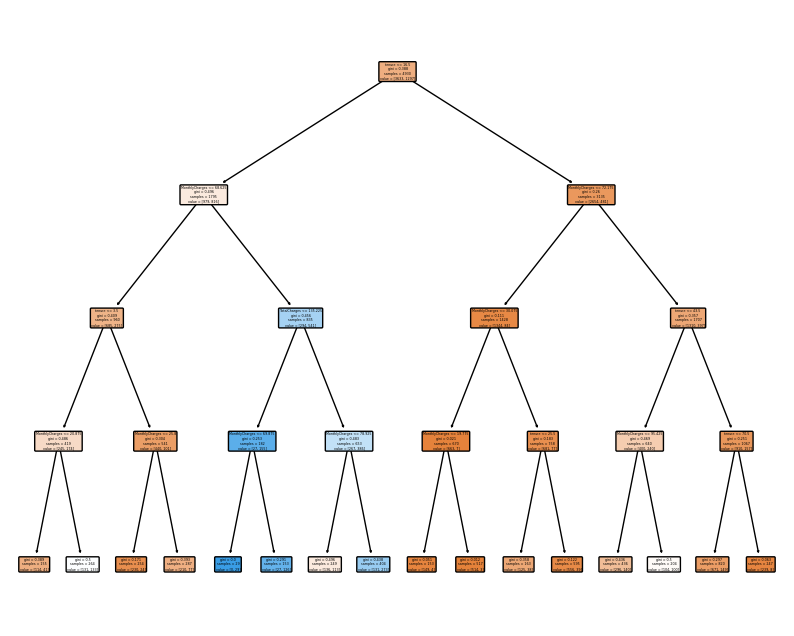

' Depth 5'

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.69,0.64
2,Recall,0.45,0.39


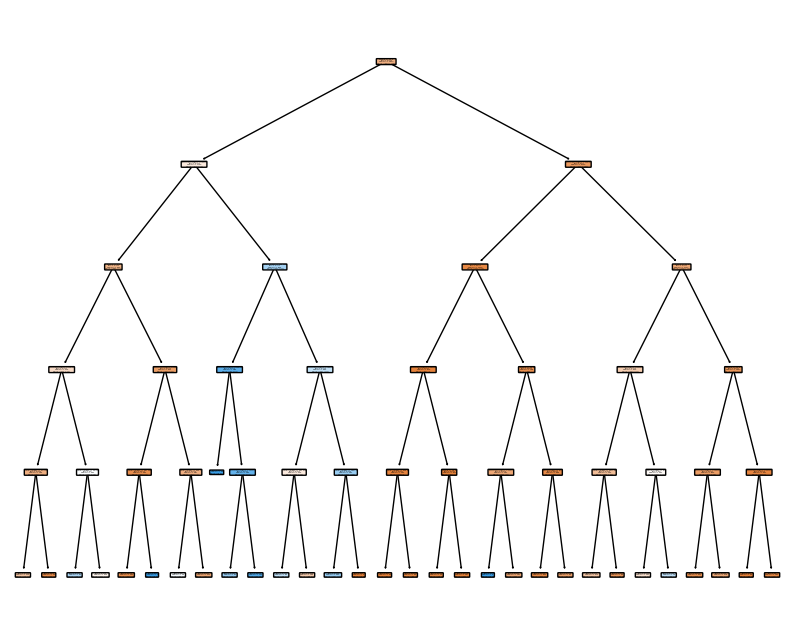

' Depth 6'

,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.72,0.64
2,Recall,0.43,0.36


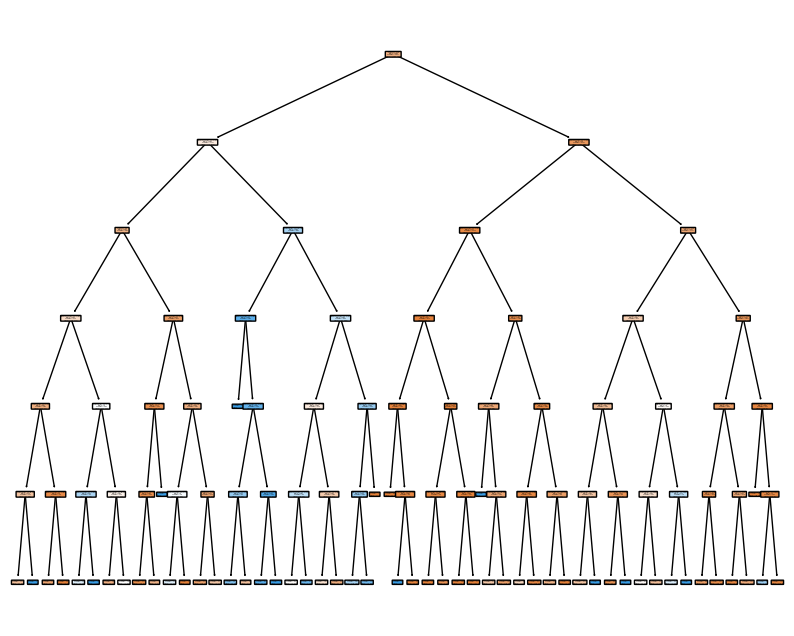

' Depth 7'

,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.74,0.63
2,Recall,0.48,0.39


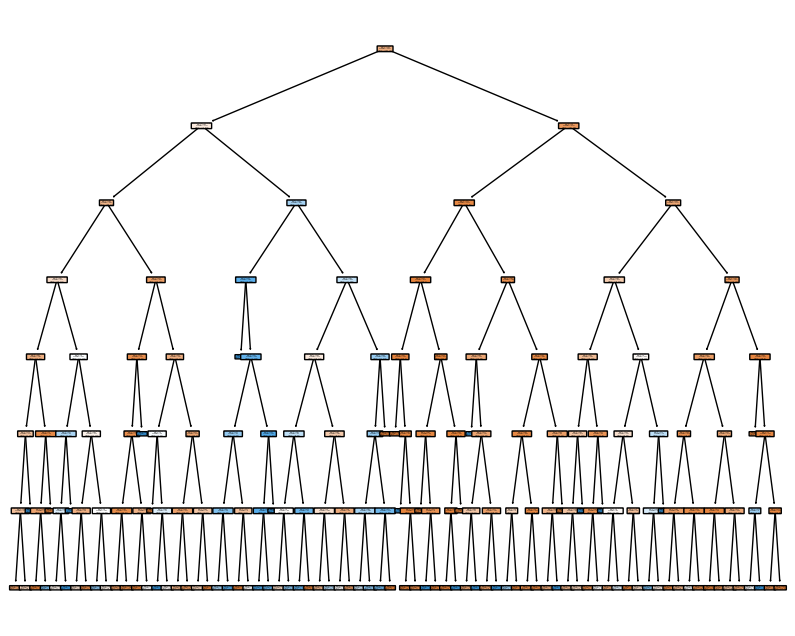

' Depth 8'

,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.74,0.61
2,Recall,0.56,0.45


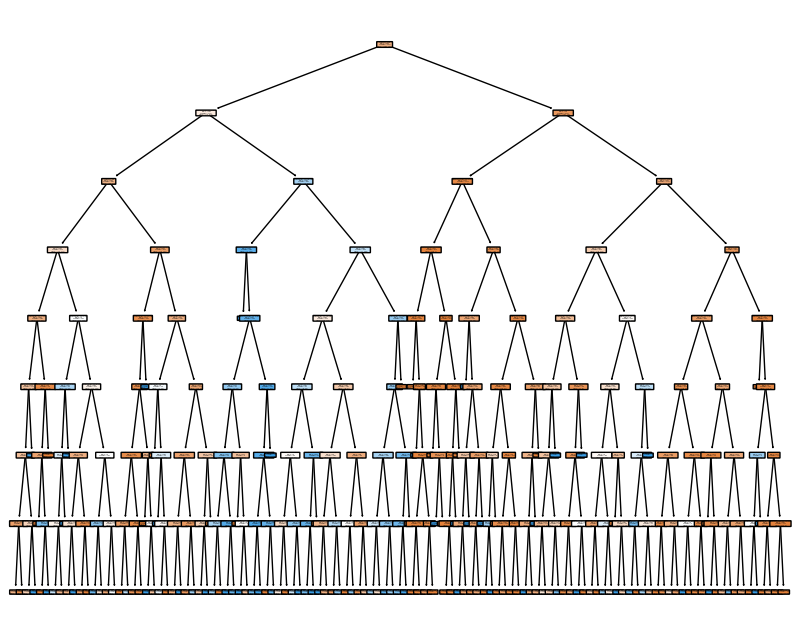

' Depth 9'

,Error_metric,Train,Test
0,Accuracy,0.84,0.76
1,Precision,0.81,0.59
2,Recall,0.53,0.39


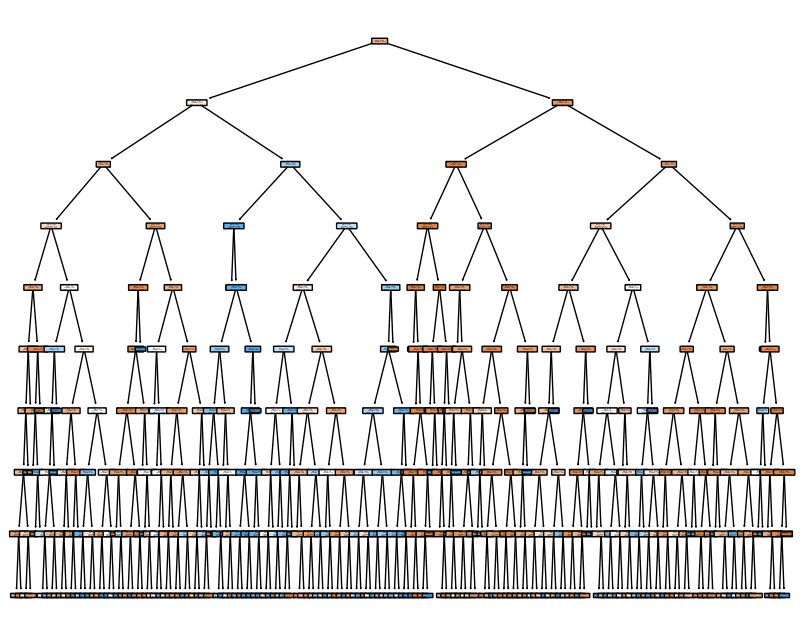

In [72]:
for i in range (1, 10):    
        
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)
        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        display(f' Depth {i}', performance_df )
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8))
        plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
        plt.show()